# Preprocesamiento estadistico de los datos

Trato con nulos, outliers, errores, datos incompletos
- DATA CLEANING: si me faltan muchos datos considero eliminar las filas
- DATA INTEGRATION
- DATA TRASNFORMATION: normalizar variables con tendencia, no se puede normalizar cualquier cosa
- DATA REDUCTION: encodeo, hay diferentes tecnicas de encodeo
hay diferentes tecnicas:
1. ONE HOT ENCODING (el problema es la variabilidad, se recomienda cuando hay pocas columnas)
2. LABEL ENCODER (cuando tengo muchas variables uso esa, a cada palabra le asigna un nro)
- DATA DISCRETIZATION


### Tratamiento de Outliers
- hay univariados, o multivariados

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print("Definiendo los simbolos de stock")
symbol_data_to_load = ['D','EXC','NEE','SO','DUK']
list_of_df = []

# Ciclo sobre simbolos

#llenar la lsita de dataframes
print(" --- Inicio de Loop --- ")
for i in symbol_data_to_load:
    print("Procesando Simbolo: " + i)
    temp_df = pd.read_csv(i+'.csv',sep=',')
    temp_df['Volume_Millions'] = temp_df['Volume'] / 1000000.0
    temp_df['Symbol'] = i # Agregar nueva columna con el simbolo
    list_of_df.append(temp_df)

print(" --- Completado loop simbolos --- ")

# Combinar en un Dataframe unico usando concat
#permite pegar los dataframes de la lista
print("Agregando la data")
agg_df = pd.concat(list_of_df, axis=0)

# Agregar estadisticas de retorno y volatilidad
# es mas rápido agregarlo al dataframe que a cada uno de los registros
print('Calculando estadisticas finales')
agg_df['VolStat'] = (agg_df['High'] - agg_df['Low']) / agg_df['Open']
agg_df['Return'] = (agg_df['Close'] / agg_df['Open']) - 1.0

print("agg_df DataFrame dimension (filas, columnas): ")
print(agg_df.shape)

print("Head del DataFrame agg_df: ")
agg_df.head()

Definiendo los simbolos de stock
 --- Inicio de Loop --- 
Procesando Simbolo: D
Procesando Simbolo: EXC
Procesando Simbolo: NEE
Procesando Simbolo: SO
Procesando Simbolo: DUK
 --- Completado loop simbolos --- 
Agregando la data
Calculando estadisticas finales
agg_df DataFrame dimension (filas, columnas): 
(6295, 11)
Head del DataFrame agg_df: 


,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861


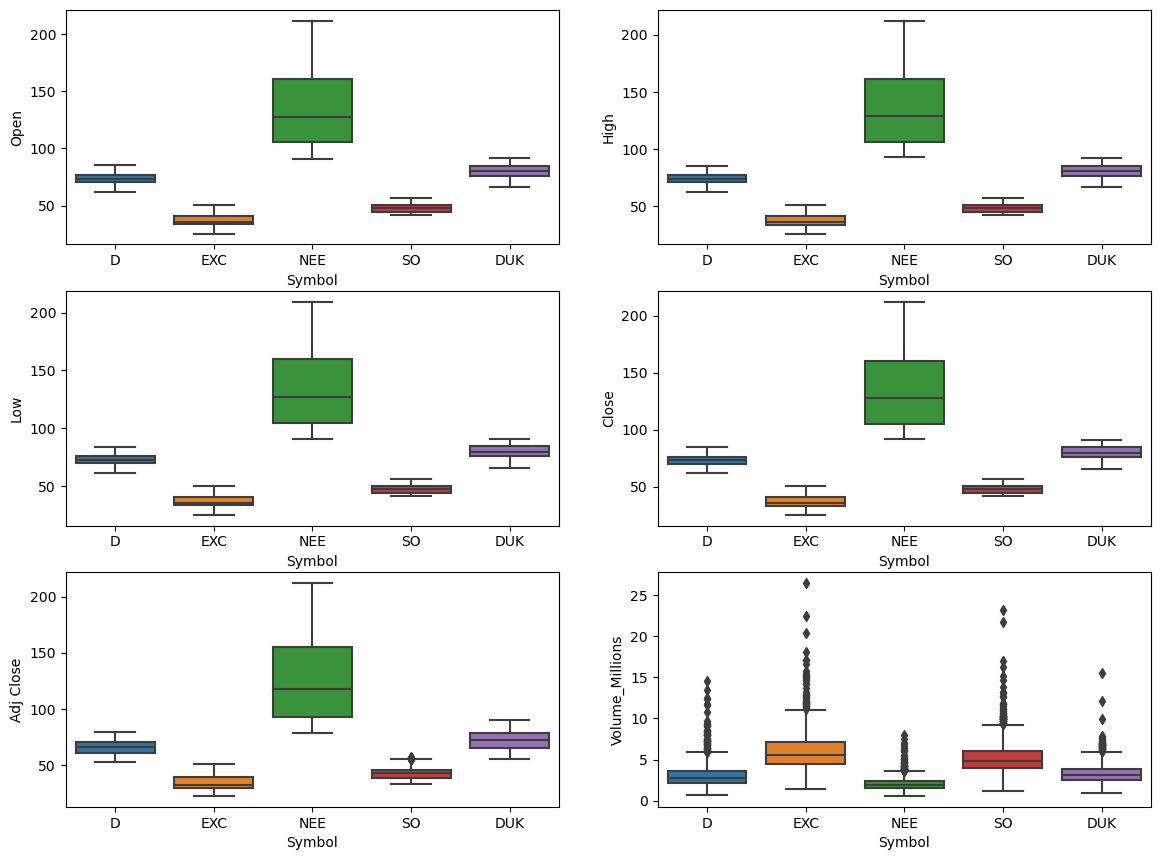

In [5]:
# Seleccionar las columnas de interes
import matplotlib.pyplot as plt

l=[x for x in agg_df.columns if x not in ['Date','Volume']] #no quiero que me recorra date y volume

# a cada columna le hacemos un boxploot

plt.figure(figsize=(14,14))#seteo el lienzo
for x,column in zip(range(8),agg_df[l]):
  if column !='Symbol':
    #print(x)
    if x<=5:
      plt.subplot(4,2,x+1)
      sns.boxplot(data=agg_df[l], y=column, x=agg_df[l]['Symbol'])

En la ultima variables vemos que los boxplot son muy chicos y que hay muchos outliers, deberia escalar, no seria correcto agrandar los graficos para solucionar esto

### IQR

- Sirve cuando los datos NO SON NORMALES

In [20]:

l=[x for x in agg_df.columns if x not in ['Date','Volume','Symbol']] #traeme todas las columnas menos esas
#date volume por que no tendria sentido
#symbol no me sirve por lo que vimos los graficos
datos= agg_df[l]
datos.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


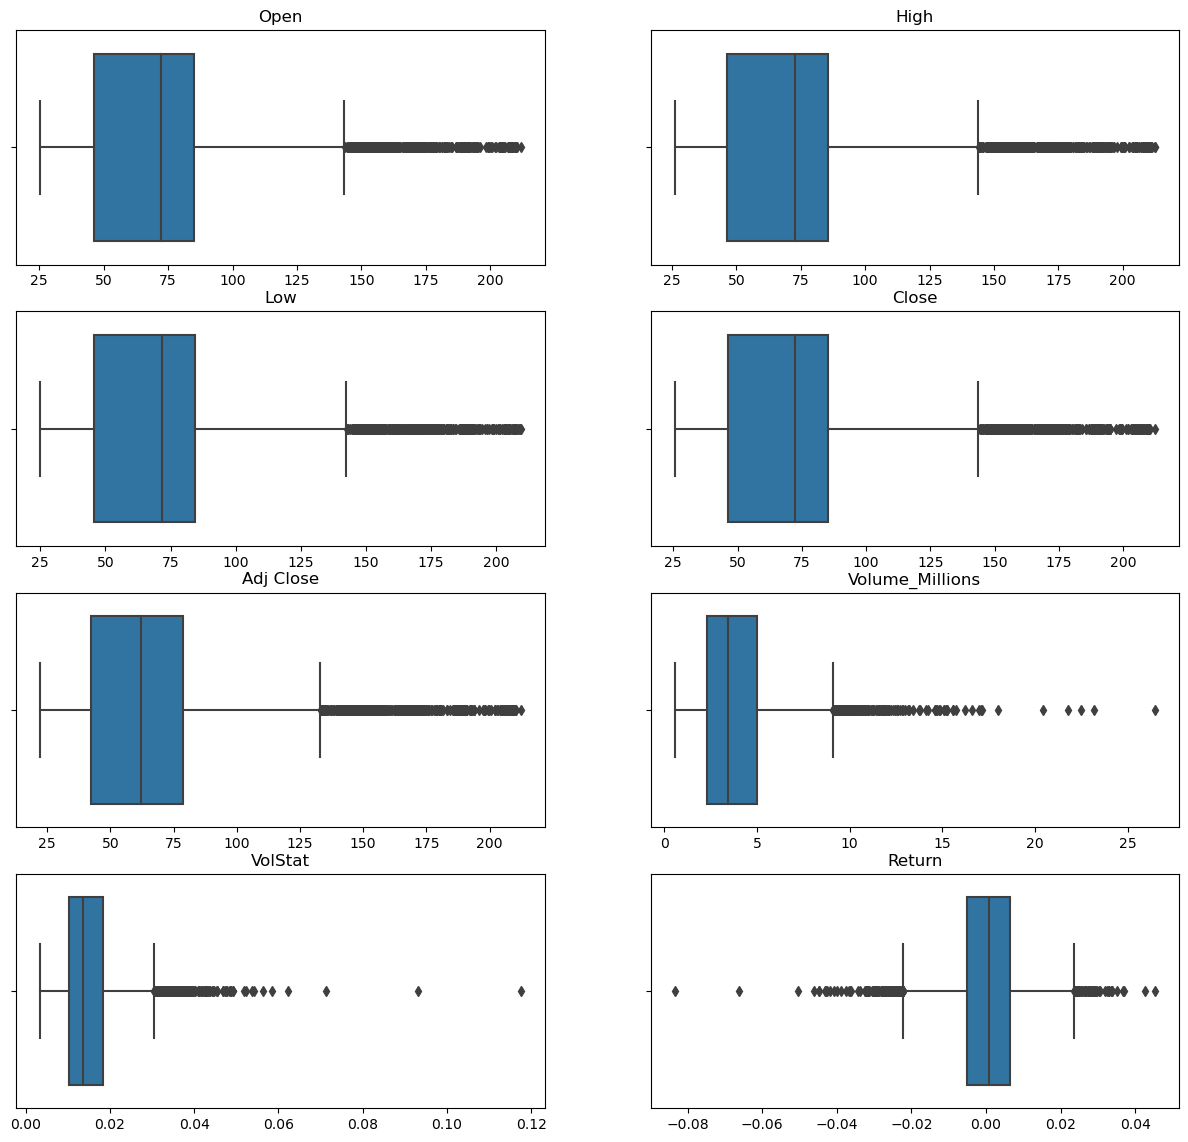

In [7]:
#del dataframe datos haceme boxplot de las variables del dataframe
#datos es el dataframe sin las variables que saque antes
plt.figure(figsize=(15,14))
for i,j in zip(range(8),datos.columns):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=datos[j])
  plt.title(j)
  plt.xlabel('')


#si los datos son NORMALES: me conviene usar IQR

### Z SCORE 
- Lo uso cuando los datos SON NORMALES
- Toma menos error
- En base a la mediana

In [8]:
# Cargar datos
datos= agg_df[agg_df['Symbol']=='D']
l=[x for x in agg_df.columns if x not in ['Volume','Symbol']]
datos=datos[l] #recorto
datos['Date']=pd.to_datetime(datos['Date'])
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


In [9]:
# Convertir a z score
datos_z=pd.DataFrame()
for j in datos.columns[1:]:
  datos_z[j] = (datos[j] - datos[j].mean()) / datos[j].std()# cada fila la calculo en torno al z score
datos_z['Fecha']= datos.Date
datos_z.head()

#me deja en base a la desviacion estandar

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,Fecha
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,2014-07-28
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,2014-07-29
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,2014-07-30
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,2014-07-31
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,2014-08-01


In [10]:
datos_z['Open_x']= datos_z['Open'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_z.head()

#aca analizo los datos y digo sin son NORMALES O ATIPICOS

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,Fecha,Open_x
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,2014-07-28,Normal
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,2014-07-29,Normal
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,2014-07-30,Normal
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,2014-07-31,Normal
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,2014-08-01,Normal


<Axes: xlabel='Fecha', ylabel='Open'>

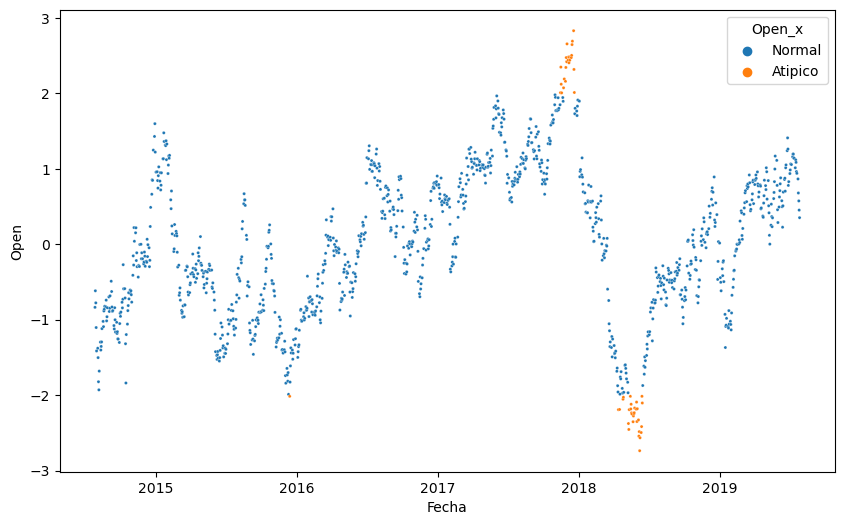

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=datos_z.Fecha, y= datos_z.Open, hue= datos_z['Open_x'],s= 5)

#hago un grafico con valores normales o ATIPICOS
#como los datos estan segun el z-scoreentre 3 y -3 

### DISTANCIA ECLEUDIANA
- Nos dice que tan distintos son nuestros ouliers de nuestros datos
- en vez de pensar la distribucion total mira dato por dato y los analiza


In [12]:
# Extraer columnas de interes
data_multiple=datos_z.drop(columns=['Open_x','Fecha'])
data_multiple.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [19]:
def outlier_euclideano_d(x,cutoff): #le damos punto de corte
  # x: dataframe con valores numericos normalizados
  result_ = pd.Series([0] * len(x.iloc[:,1]))  #crea una serie llamada result que contiene ceros y tiene la misma longitud que la segunda col de un df
  data_mean = x.mean() # media de los datos_
  dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Distancia euclideana
  dist_mean = dist.mean() #media de las distancia
  dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score para las distancias
  result_[((dist_zscore > 3))] = 1
  return result_

#reemplazo todos los datos del df con distancia ecleudiana (otro tipo de estadistico)


In [14]:
# Crear una copia de los datos
euc_d = data_multiple.copy()
euc_d.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [15]:
# Aplicar la funcion
#si esta por lejos de 2 la distancia eucleudiana detectalo como outlier
euc_d['outlier']=outlier_euclideano_d(euc_d,2)
euc_d.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,outlier
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,0
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,0
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,0
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,0
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,0


<Axes: xlabel='Open', ylabel='VolStat'>

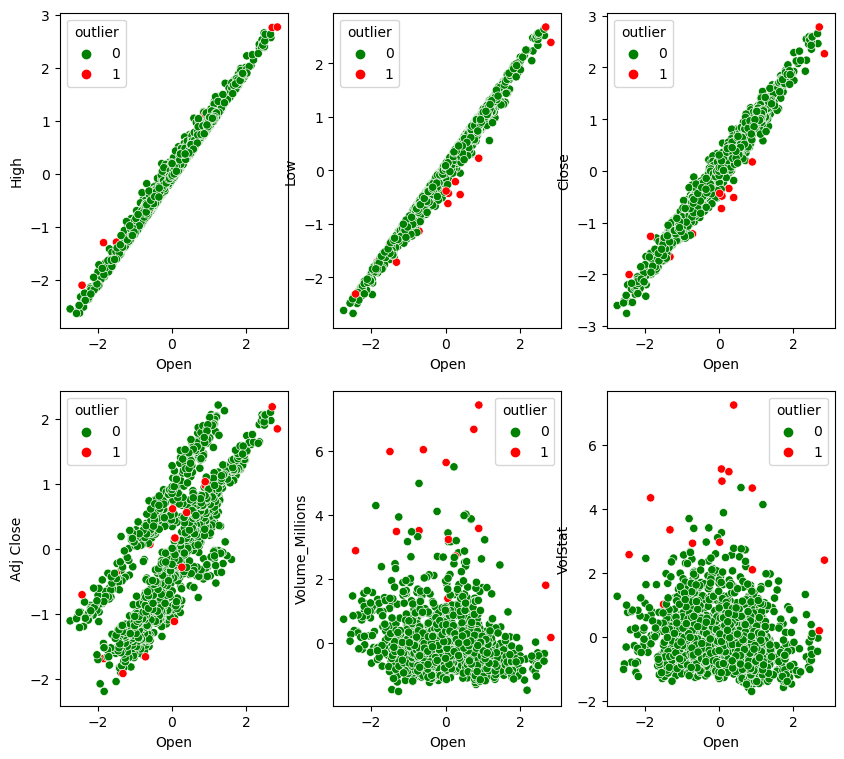

In [18]:
plt.figure(figsize=(10,9))
plt.subplot(2,3,1)
sns.scatterplot(x="Open",y="High",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,2)
sns.scatterplot(x="Open",y="Low",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,3)
sns.scatterplot(x="Open",y="Close",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,4)
sns.scatterplot(x="Open",y="Adj Close",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,5)
sns.scatterplot(x="Open",y="Volume_Millions",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,6)
sns.scatterplot(x="Open",y="VolStat",data=euc_d,hue="outlier",palette=["green","red"])

#grafico de los ouliers

- ELIMINACION DE OUTLIERS
#https://github.com/PanamaHitek/machine_learning_tutorials/blob/fb5872a664c8b071a63ef2760bd8a40a7129cae5/python/machine_learning_examples/sklearn/red_wine_quality/outliers_identification/iqr_cleaning.py

- TRATAMIENTO DE OULIERS
https://panamahitek.com/identificacion-y-eliminacion-de-outliers-en-machine-learning/